## Loading Data from the Dev GeoDB

The Database is hosted at AWS as an RDS service:

- Hostname: db-dcfs-geodb.cbfjgqxk302m.eu-central-1.rds.amazonaws.com
- Port: 5432
- Database postgres
- User: postres

Schema of the GeoDB:

```sql
CREATE TABLE "public"."land_use" (
    "id" integer DEFAULT nextval('land_user_id_seq') NOT NULL,
    "raba_id" integer NOT NULL,
    "d_od" date NOT NULL,
    "geometry" geometry NOT NULL,
    "raba_pid" double precision NOT NULL
) WITH (oids = false);
```



### Load Data using the convenience function _load_geodb_

__step 1__: Import the function and the default connection parameters to set the password

In [4]:
from dcfs_geodb import load_geodb, geodb_connect, raw_query
from dcfs_geodb import PG_DEFAULT_CONNECTION_PARAMETERS

__step 2__:

Set the password. It is also possible to set the password as an environment variable (_PG_GEODB_PASSWORD_)


In [5]:
PG_DEFAULT_CONNECTION_PARAMETERS['password'] = "*******"
con = geodb_connect(con=PG_DEFAULT_CONNECTION_PARAMETERS)

__step 3__: Load (all) data

It is possible to pass an sql statement. _load_geodb_ also accepts a _psycopg2_ connection. If ```con``` is None, teh DEFAULT will be used but you will require 
the password to be set as an environment variable.

_DEFAULT_LOAD_SQL_:

```sql
SELECT raba_pid, raba_id, d_od, geometry FROM land_use
```

In [6]:
gdfall = load_geodb(con=con)

__Step 4__: explore the data

In [7]:
gdfall

,raba_pid,raba_id,d_od,geometry
0,4770326.0,1410,2019-03-26,"POLYGON ((453952.629 91124.177, 453952.696 911..."
1,4770325.0,1300,2019-03-26,"POLYGON ((453810.376 91150.19899999999, 453812..."
2,2305689.0,7000,2019-02-25,"POLYGON ((456099.635 97696.07000000001, 456112..."
3,2305596.0,1100,2019-02-25,"POLYGON ((455929.405 97963.785, 455933.284 979..."
4,2310160.0,1100,2019-03-11,"POLYGON ((461561.512 96119.25599999999, 461632..."
...,...,...,...,...
19649,6253989.0,1600,2019-03-08,"POLYGON ((460637.334 96865.891, 460647.927 969..."
19650,6252044.0,1600,2019-03-26,"POLYGON ((459467.868 96839.686, 459467.77 9686..."
19651,6245985.0,2000,2019-04-08,"POLYGON ((459488.998 94066.24800000001, 459498..."
19652,6245986.0,2000,2019-02-20,"POLYGON ((459676.68 94000, 459672.469 93981.44..."


Plot the polygons:

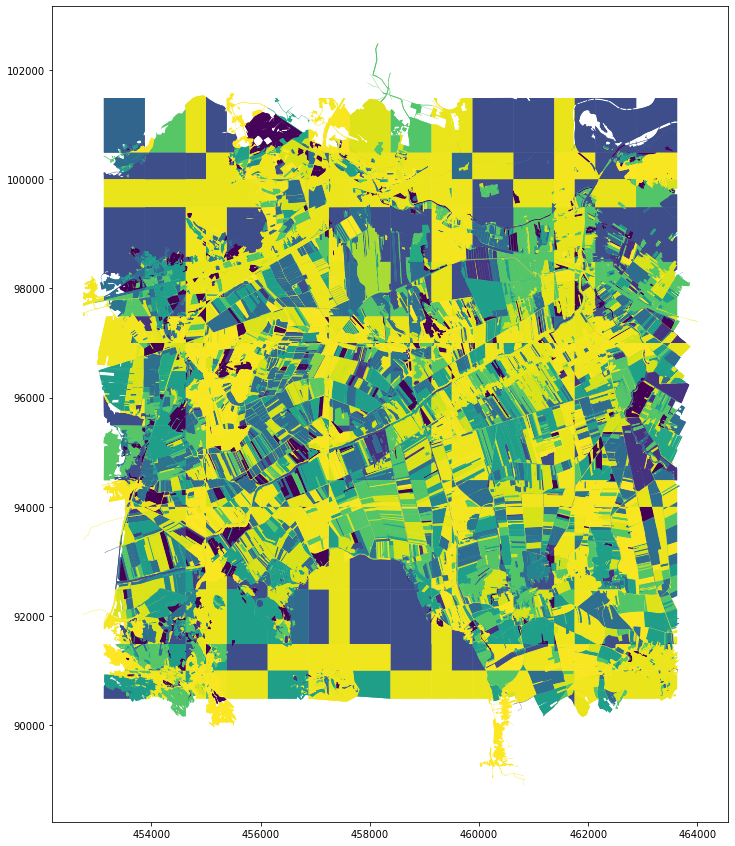

In [9]:
gdfall.plot(column="raba_pid", figsize=(15,15))

Subselect the data. Here: Select the first row

In [14]:
sql = "SELECT raba_pid, raba_id, d_od, geometry FROM land_use LIMIT 1"
gdfone = load_geodb(con=con, sql=sql)

In [11]:
gdfone

,raba_pid,raba_id,d_od,geometry
0,4770326.0,1410,2019-03-26,"POLYGON ((453952.629 91124.177, 453952.696 911..."


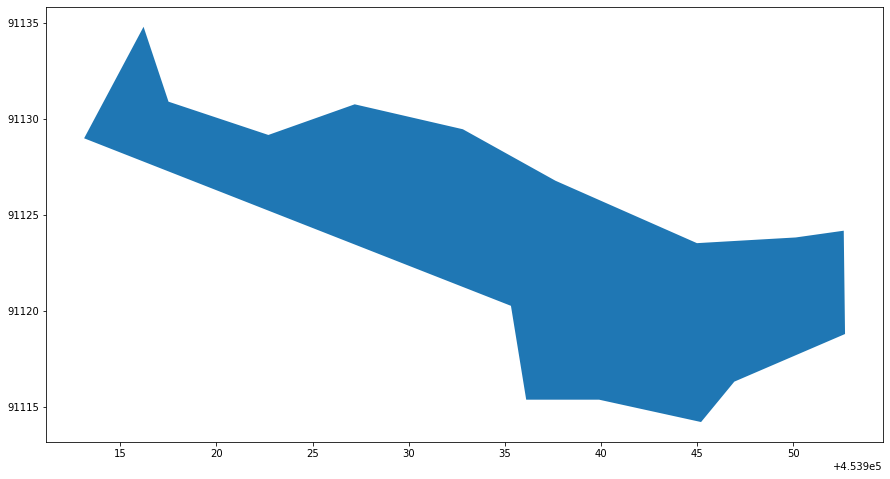

In [12]:
gdfone.geometry.plot(figsize=(15,15))

In [13]:
raw_query(con=con)

[(19654,)]